<a href="https://colab.research.google.com/github/JoshOlu/data602/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#14 A
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from google.colab import files
uploaded = files.upload()

auto_data = pd.read_csv("Auto.csv")
mpg_median = auto_data['mpg'].median()
auto_data['mpg01'] = (auto_data['mpg'] > mpg_median).astype(int)

auto_data.replace('?', np.nan, inplace=True)
auto_data.dropna(inplace=True)

auto_data[['mpg', 'mpg01']].head()

Saving Auto.csv to Auto.csv


,mpg,mpg01
0,18.0,0
1,15.0,0
2,18.0,0
3,16.0,0
4,17.0,0


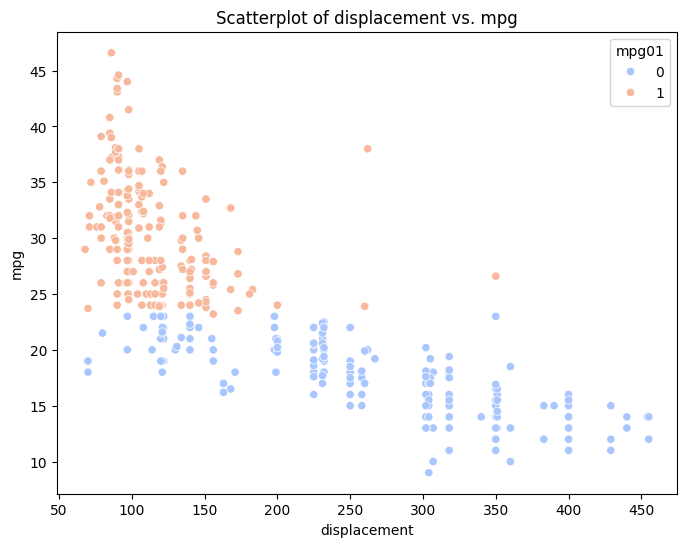

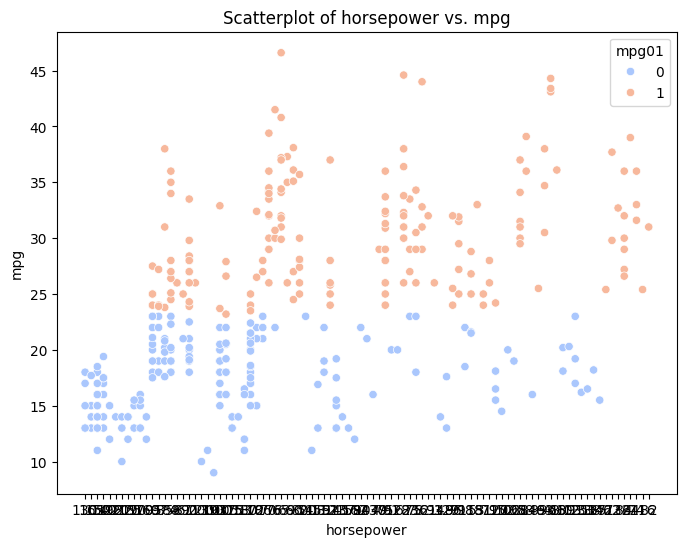

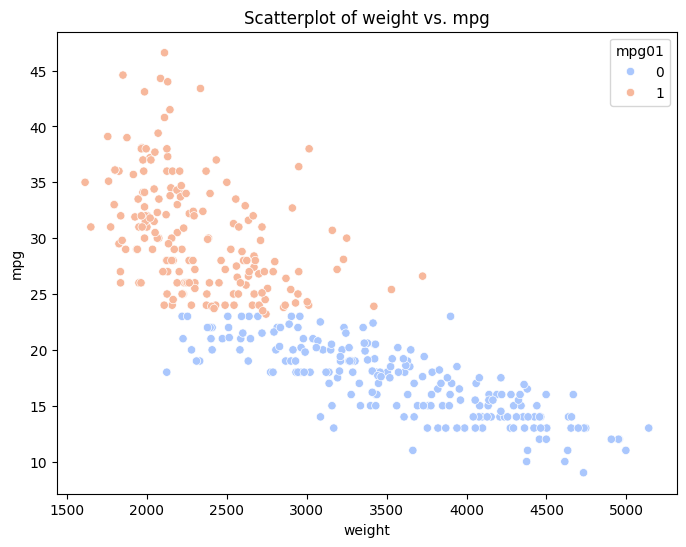

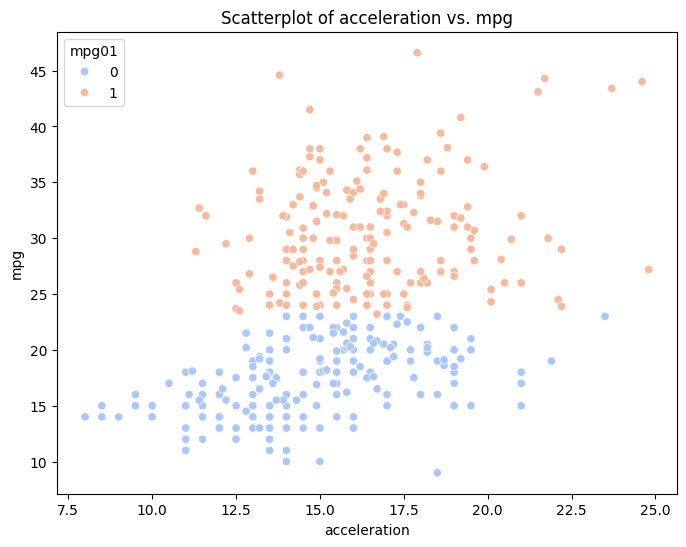

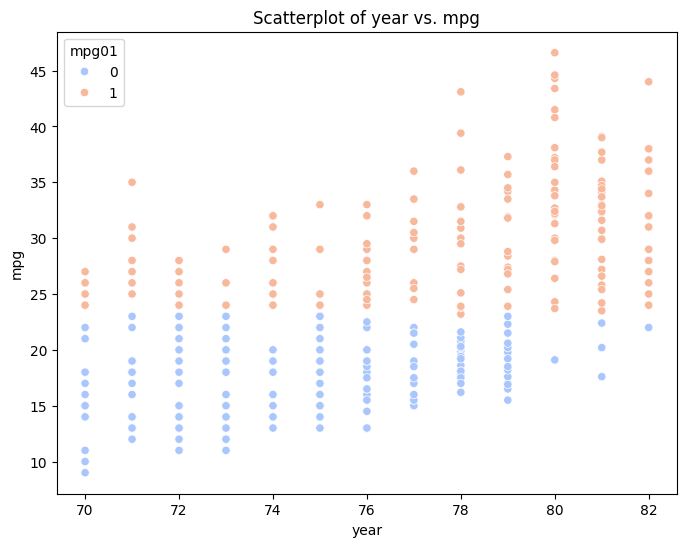

<ipython-input-2-704151f9efc7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=auto_data['mpg01'], y=auto_data[feature], palette="coolwarm")


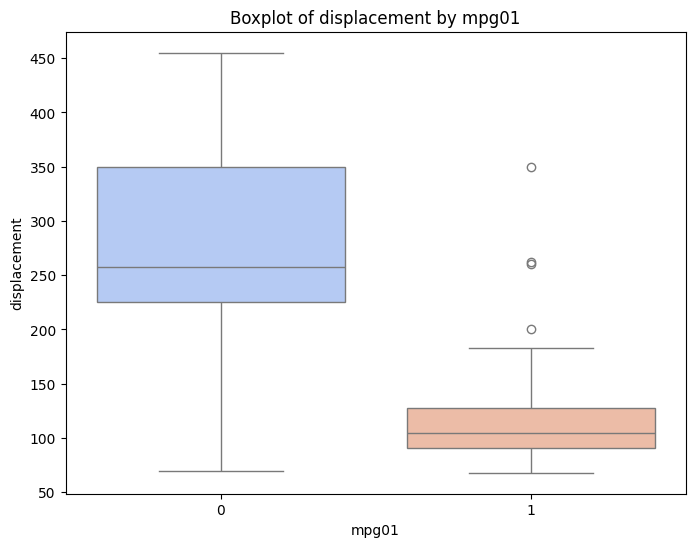

<ipython-input-2-704151f9efc7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=auto_data['mpg01'], y=auto_data[feature], palette="coolwarm")


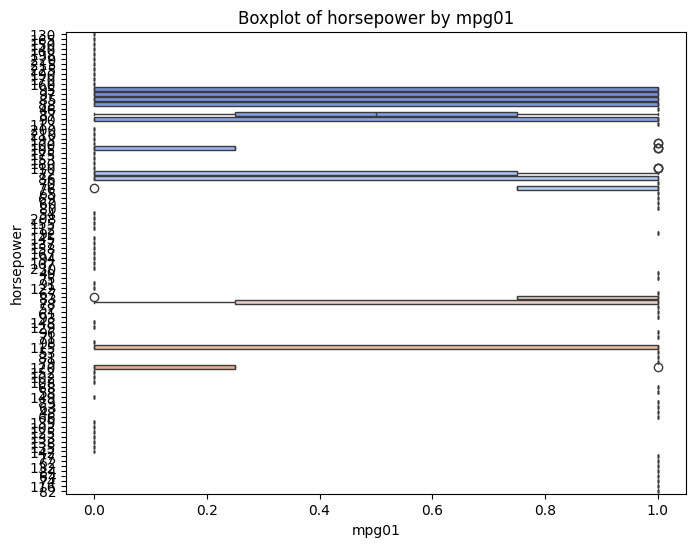

<ipython-input-2-704151f9efc7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=auto_data['mpg01'], y=auto_data[feature], palette="coolwarm")


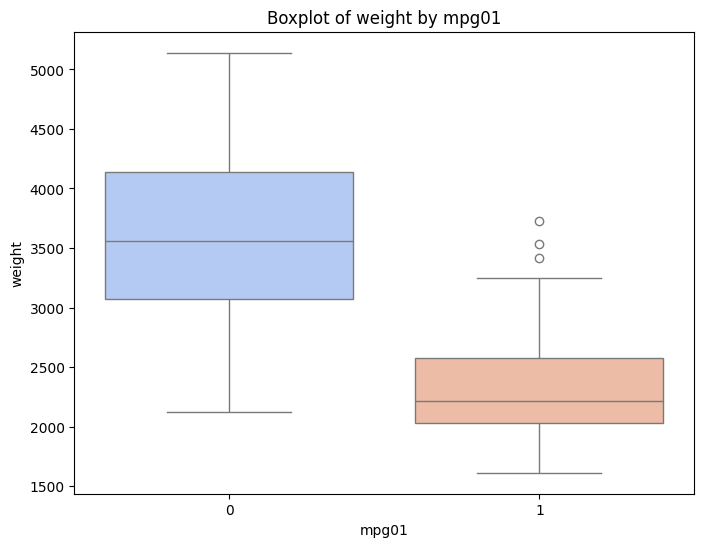

<ipython-input-2-704151f9efc7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=auto_data['mpg01'], y=auto_data[feature], palette="coolwarm")


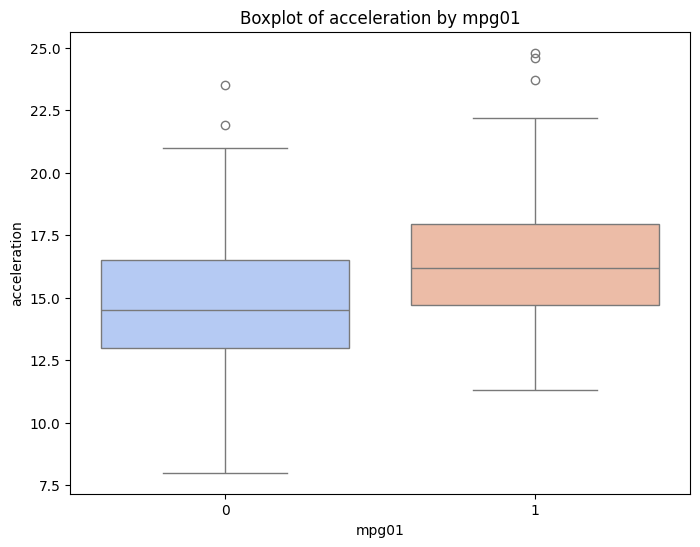

<ipython-input-2-704151f9efc7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=auto_data['mpg01'], y=auto_data[feature], palette="coolwarm")


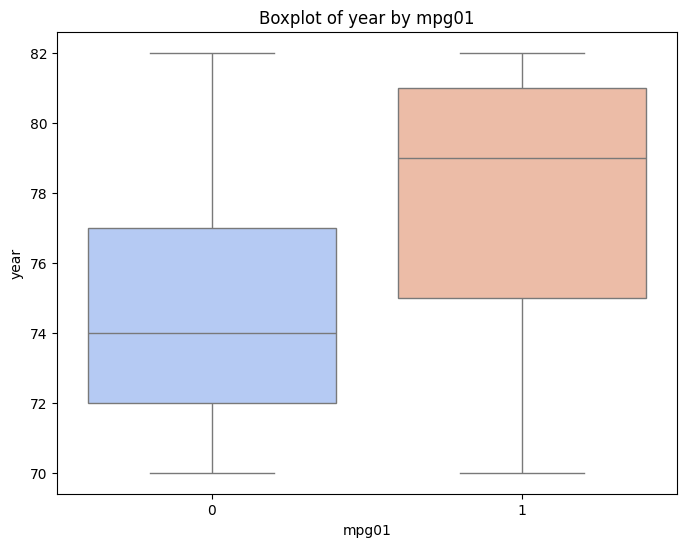

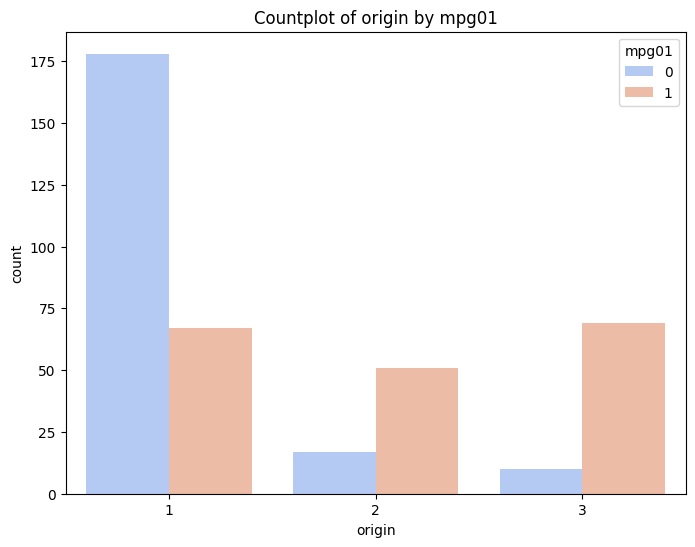

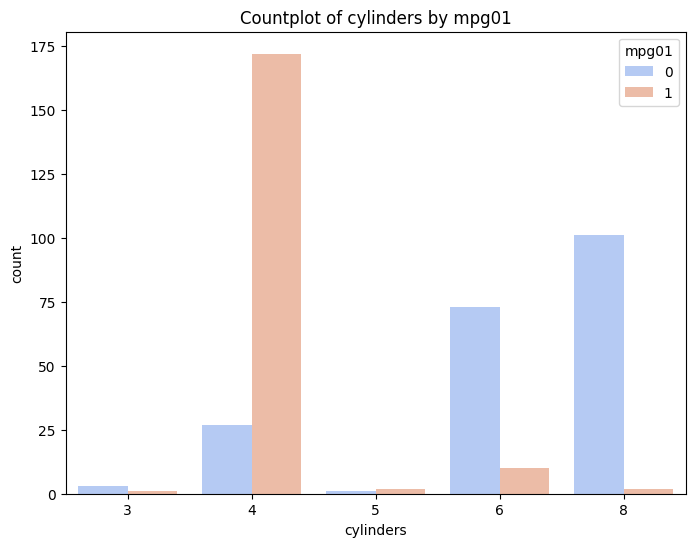

In [2]:
#14 B

features_01 = ['displacement', "horsepower", 'weight', 'acceleration', 'year']

for feature in features_01:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=auto_data[feature], y=auto_data['mpg'], hue=auto_data['mpg01'], palette="coolwarm")
    plt.title(f'Scatterplot of {feature} vs. mpg')
    plt.show()

for feature in features_01:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=auto_data['mpg01'], y=auto_data[feature], palette="coolwarm")
    plt.title(f'Boxplot of {feature} by mpg01')
    plt.show()

features_02 = ['origin', 'cylinders']

for feature in features_02:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='mpg01', data=auto_data, palette="coolwarm")
    plt.title(f'Countplot of {feature} by mpg01')
    plt.show()

Displacement vs. mpg - higher displacement, lower mpg - mpg01 low displacement, high mpg
horsepower vs mpg - higher horsepower, higher mpg - mpg01 consistent horsepower with mpg
weight vs mpg - more weight (heavier the car), lower mpg - mpg01 lower weight high mpg
acceleration vs mpg - higher acceleration, higher mpg - mpg01 constient acceleration with mpg
year vs mpg - later the year, higher mpg - mpg01 later the year, higher mpg

In [3]:
#14 C

feature = auto_data.drop(columns=['mpg01'])
target = auto_data['mpg01']

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2, random_state=42)

print(f"Training set length: {feature_train.shape[0]}")
print(f"Test set length: {feature_test.shape[0]}")

Training set length: 313
Test set length: 79


In [4]:
#14 H

knn_features = auto_data[features_01]
knn_target = auto_data['mpg01']

knn_features_train, knn_features_test, knn_target_train, knn_target_test = train_test_split(knn_features, knn_target, test_size=0.2, random_state=42)

k_values = [1, 3, 5, 7, 9, 11, 13, 15]
test_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(knn_features_train, knn_target_train)
    knn_target_pred = knn.predict(knn_features_test)

    accuracy = accuracy_score(knn_target_test, knn_target_pred)
    error = 1 - accuracy
    test_errors.append(error)

    print(f"K = {k}: Test Error = {error:.4f}")

best_k = k_values[test_errors.index(min(test_errors))]
print(f"\nBest K: {best_k}. Test Error = {min(test_errors):.4f}")

K = 1: Test Error = 0.1646
K = 3: Test Error = 0.1139
K = 5: Test Error = 0.1266
K = 7: Test Error = 0.1266
K = 9: Test Error = 0.1266
K = 11: Test Error = 0.1392
K = 13: Test Error = 0.1266
K = 15: Test Error = 0.1266

Best K: 3. Test Error = 0.1139


Explained Variance Ratio by Principal Components (Without Scaling):
Principal Component 1: 0.9976
Principal Component 2: 0.0021
Principal Component 3: 0.0004
Principal Component 4: 0.0000
Principal Component 5: 0.0000


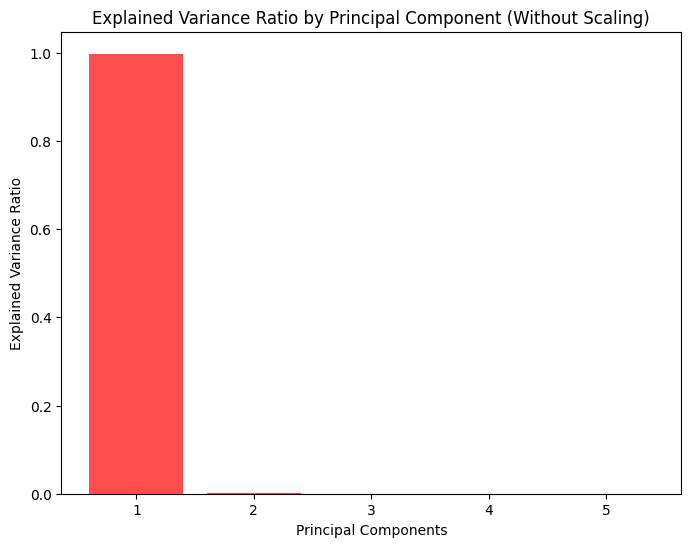

In [5]:
pca_features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
X_pca = auto_data[pca_features].copy()

X_pca.replace('?', np.nan, inplace=True)
X_pca.dropna(inplace=True)

X_pca = X_pca.astype(float)

pca_no_scaling = PCA(n_components=len(pca_features))
X_pca_transformed_no_scaling = pca_no_scaling.fit_transform(X_pca)

explained_variance_no_scaling = pca_no_scaling.explained_variance_ratio_
print("Explained Variance Ratio by Principal Components (Without Scaling):")
for i, variance in enumerate(explained_variance_no_scaling, 1):
    print(f"Principal Component {i}: {variance:.4f}")

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_no_scaling) + 1), explained_variance_no_scaling, alpha=0.7, color='red')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio by Principal Component (Without Scaling)')
plt.show()

Explained Variance Ratio by Principal Components (After Scaling):
Principal Component 1: 0.8144
Principal Component 2: 0.1388
Principal Component 3: 0.0267
Principal Component 4: 0.0129
Principal Component 5: 0.0073


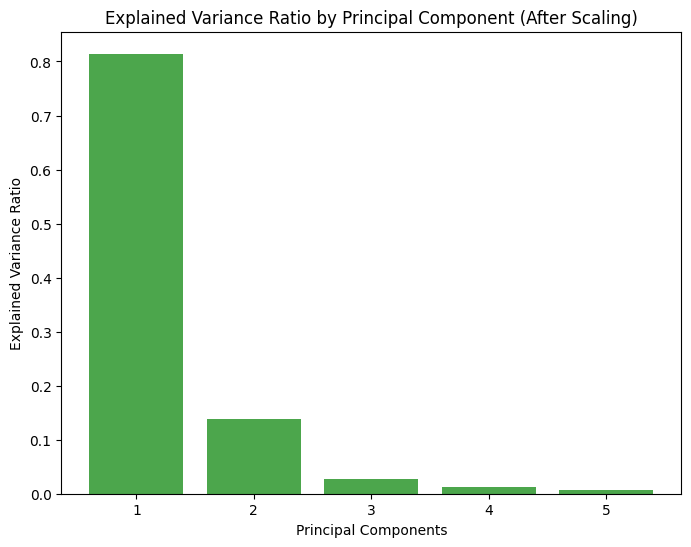


PCA without scaling:
          PC1        PC2        PC3       PC4       PC5
0  536.437175  50.723576 -10.883006 -1.909146  0.779334
1  730.333848  79.036747   8.919393  0.385443  0.236815
2  470.973760  75.339924   5.040703 -0.906096  0.701328
3  466.393605  62.421740   9.205310 -0.041214  0.926573
4  481.660073  55.668193   0.385163 -2.444928  0.884829

PCA after scaling:
        PC1       PC2       PC3       PC4       PC5
0  2.242403 -0.479758  0.759174 -0.019326 -0.073663
1  3.035319 -0.599310  0.219264 -0.360650  0.098903
2  2.622952 -0.872521  0.536815 -0.284388 -0.040278
3  2.436430 -0.576210  0.455281 -0.386402 -0.140430
4  2.493047 -1.024095  0.695004 -0.064759 -0.145922


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

pca_with_scaling = PCA(n_components=len(pca_features))
X_pca_transformed_scaled = pca_with_scaling.fit_transform(X_scaled)

explained_variance_with_scaling = pca_with_scaling.explained_variance_ratio_
print("Explained Variance Ratio by Principal Components (After Scaling):")
for i, variance in enumerate(explained_variance_with_scaling, 1):
    print(f"Principal Component {i}: {variance:.4f}")

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_with_scaling) + 1), explained_variance_with_scaling, alpha=0.7, color='green')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance Ratio by Principal Component (After Scaling)')
plt.show()

pca_df_no_scaling = pd.DataFrame(X_pca_transformed_no_scaling, columns=[f'PC{i}' for i in range(1, len(pca_features)+1)])
pca_df_scaled = pd.DataFrame(X_pca_transformed_scaled, columns=[f'PC{i}' for i in range(1, len(pca_features)+1)])

print("\nPCA without scaling:")
print(pca_df_no_scaling.head())

print("\nPCA after scaling:")
print(pca_df_scaled.head())

Principal component 1, before and after scaling, shows majority of the variance. Before scaling, it shows 99.76% if the variance, meaning one feature amounts to most of the variance.

After scaling, principal components 3, 4, and 5 are much more balanced, but principal component 1 still accounts for the majority of the variance, at 81.44%.